# Evaluate Model

__cross_val_score__ using the cv parameter. 

cross validation for regression
stratified k-fold for classification

- using __KFold__ splitter to instead of the cv parameter so that we can reproduce issue. 
- using __LeaveOneOut__ splitter to instead of the cv parameter. You can think each fold is a single sample. 
- using __shuffle-split__ -> train_size, test_size, n_iter  {StratifiedShuffleSplit}

__GridSearchCV__ using grid search on parameters set and cross validation on data set


In [1]:
import sys
print("Python version: {}".format(sys.version))

import pandas as pd
print("pandas version: {}".format(pd.__version__))

import matplotlib
print("matplotlib version: {}".format(matplotlib.__version__))

import numpy as np
print("numpy version: {}".format(np.__version__))

import scipy as sp 
print("scipy version: {}".format(sp.__version__))

import IPython 
print("IPython version: {}".format(IPython.__version__))

import sklearn
print("sklearn version: {}".format(sklearn.__version__))

import mglearn
print("mglearn version: {}".format(mglearn.__version__))

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt


Python version: 3.7.3 (default, Mar 27 2019, 16:54:48) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
pandas version: 0.24.2
matplotlib version: 3.0.3
numpy version: 1.16.2
scipy version: 1.2.1
IPython version: 7.4.0
sklearn version: 0.20.3
mglearn version: 0.1.7


## Don't use cross-validation on iris logistic regression model 

In [2]:
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# create a snythetic dataset
X, y = make_blobs(random_state=0)

# split data and labels into a training and a test set 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# instantiate a model and fit it to the training set 
logreg = LogisticRegression().fit(X_train, y_train)

# evaluate the mode on the test set
print("Test set score: {:.2f}".format(logreg.score(X_test, y_test)))


Test set score: 0.88


## Use cross_val_score on iris logistic regression model

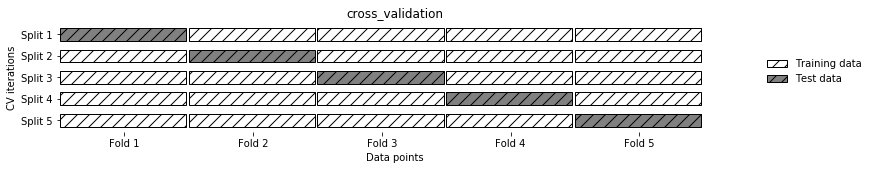

In [3]:
mglearn.plots.plot_cross_validation()

plt.show()

In [4]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

iris = load_iris()
logreg = LogisticRegression()

# the defalut cv = 3, it means that we split the data into 3 part and create model on them. 
scores = cross_val_score(logreg, iris.data, iris.target)
print("Cross-Validation with cv=3 scores: {}".format(scores))
print("Average Cross-Validation with cv=3 scores: {:.2f}".format(scores.mean()))

# cv = 5, it means that we split the data into 5 part and create model on them. 
scores = cross_val_score(logreg, iris.data, iris.target, cv=5)
print("Cross-Validation with cv=5 scores: {}".format(scores))

# print average scores while cv = 5. 
print("Average Cross-Validation with cv=5 scores: {:.2f}".format(scores.mean()))

Cross-Validation with cv=3 scores: [0.96078431 0.92156863 0.95833333]
Average Cross-Validation with cv=3 scores: 0.95
Cross-Validation with cv=5 scores: [1.         0.96666667 0.93333333 0.9        1.        ]
Average Cross-Validation with cv=5 scores: 0.96


## Use KFold for cv parameter on iris logistic regression model

Iris labels:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


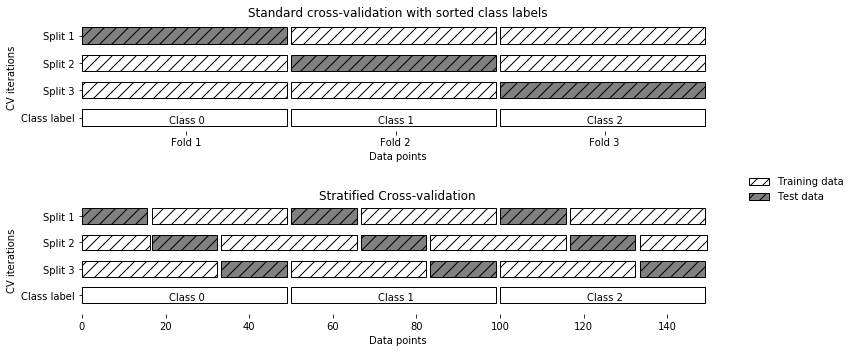

In [5]:
# The simple k-fold strategy will fail here. Since if we use 3-fold, 
# the 1-part could be 0 class, 2-part is 1 class and the last is 2 class. The accuaracy is not good on test set. 
print("Iris labels:\n{}".format(iris.target))

# use stratified k-fold cross validation to fix this issue. In stratified k-fold cross validation, we split the data 
# such that the proporitions between classes are the same in each fold as they are in the whold dataset. 
mglearn.plots.plot_stratified_cross_validation()
plt.show()

In [6]:
# using kfold to have a capability to reproduce issue since the data set is fixed. 
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5)
print("Cross-validation scores with KFold and n_splits=5:\n{}".format(cross_val_score(logreg, iris.data, iris.target, cv=kfold)))

# really bad idea to use three-fold on iris dataset. 
# nothing can learn with 3-fold. 
kfold = KFold(n_splits=3)
print("Cross-validation scores with KFold and n_splits=3:\n{}".format(cross_val_score(logreg, iris.data, iris.target, cv=kfold)))

kfold = KFold(n_splits=3, shuffle=True, random_state=0)
print("Cross-validation scores with KFold, n_splits=3 and shuffle:\n{}".format(cross_val_score(logreg, iris.data, iris.target, cv=kfold)))

Cross-validation scores with KFold and n_splits=5:
[1.         0.93333333 0.43333333 0.96666667 0.43333333]
Cross-validation scores with KFold and n_splits=3:
[0. 0. 0.]
Cross-validation scores with KFold, n_splits=3 and shuffle:
[0.9  0.96 0.96]


## Use LeaveOneOut for cv parameter on iris logistic regression model

In [7]:
from sklearn.model_selection import LeaveOneOut

loo = LeaveOneOut()
scores = cross_val_score(logreg, iris.data, iris.target, cv=loo)
print("Number of cv iterations: ", len(scores))
print("Mean accuracy: {:.2f}".format(scores.mean()))

Number of cv iterations:  150
Mean accuracy: 0.95


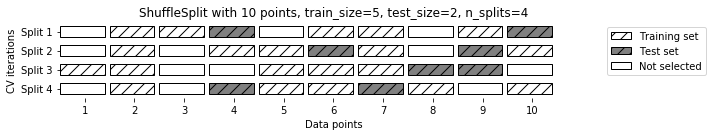

Cross-validation scores with ShuffleSplit:
[0.96       0.97333333 0.93333333 0.90666667 0.93333333 0.89333333
 0.90666667 0.94666667 0.96       0.92      ]


In [8]:
mglearn.plots.plot_shuffle_split()
plt.show()

from sklearn.model_selection import ShuffleSplit
shuffle_split = ShuffleSplit(test_size=0.5, train_size=0.5, n_splits=10)
scores = cross_val_score(logreg, iris.data, iris.target, cv=shuffle_split)
print("Cross-validation scores with ShuffleSplit:\n{}".format(scores))

## Use GroupKFold for cv parameter on iris logistic regression model

Cross-validation scores with GroupKFold:
[0.75       0.8        0.66666667]
['__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', 'cm2', 'cm3', 'plot_2d_classification', 'plot_2d_separator', 'plot_agglomerative', 'plot_agglomerative_algorithm', 'plot_animal_tree', 'plot_binary_confusion_matrix', 'plot_confusion_matrix_illustration', 'plot_cross_val_selection', 'plot_cross_validation', 'plot_dbscan', 'plot_decision_threshold', 'plot_decomposition', 'plot_grid_search_overview', 'plot_group_kfold', 'plot_improper_processing', 'plot_kmeans_algorithm', 'plot_kmeans_boundaries', 'plot_kmeans_faces', 'plot_knn_classification', 'plot_knn_regression', 'plot_linear_regression_wave', 'plot_linear_svc_regularization', 'plot_logistic_regression_graph', 'plot_nmf_faces', 'plot_nmf_illustration', 'plot_pca_faces', 'plot_pca_illustration', 'plot_pca_whitening', 'plot_proper_processing', 'plot_ridge_n_samples', 'plot_scaling', 'plot_shuffl

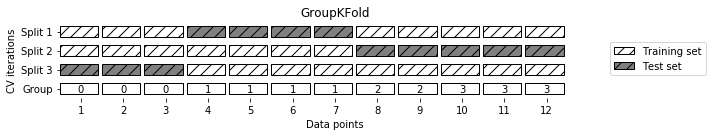

In [9]:
from sklearn.model_selection import GroupKFold

# creat synthetic dataset
X, y = make_blobs(n_samples=12, random_state=0)

# assume the first three samples belong to the same group, then the next four, etc.
groups = [0,0,0, 1,1,1,1, 2,2, 3,3,3]
scores = cross_val_score(logreg, X, y, groups, cv=GroupKFold(n_splits=3))
print("Cross-validation scores with GroupKFold:\n{}".format(scores))

print(dir(mglearn.plots))
mglearn.plots.plot_group_kfold()
plt.show()

## Grid Search

Size of training set: 112 size of test set: 38
Best score: 0.97
Best parameters: {'C': 100, 'gamma': 0.001}


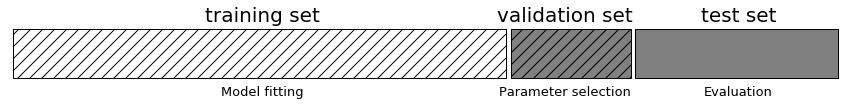

In [10]:
# naive grid search implementation
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)
print("Size of training set: {} size of test set: {}".format(X_train.shape[0], X_test.shape[0]))

best_score=0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # for each combination of parameters, train an SVC
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        # evaluate the SVC on the test set
        score = svm.score(X_test, y_test)
        # if we got a better score, store the score and the parameters
        if score > best_score:
            best_score = score
            best_parameters = {'C':C, 'gamma': gamma}
print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))

# Is it the best model? No, The best accuaracy won't necessarily carry over to new data. 
# We split the data into 3 part: training, validation and test. 
# Training   ---> build the model
# Validation ---> select the parameters of the model
# Test       ---> evaluate the performance of the selected parameters. 
# please see the this chart. 

mglearn.plots.plot_threefold_split()
plt.show()

In [11]:
from sklearn.svm import SVC

# split data into train+validation set and test set
X_trainval, X_test, y_trainval, y_test = train_test_split(iris.data, iris.target, random_state=0)
print("Size of training+validation set: {} size of test set: {}".format(X_trainval.shape[0], X_test.shape[0]))

# split train+validation set into training and valiation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, random_state=1)
print("Size of training set: {} size of test set: {}".format(X_train.shape[0], X_valid.shape[0]))

best_score=0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # for each combination of parameters, train an SVC
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        # evaluate the SVC on the test set
        score = svm.score(X_valid, y_valid)
        # if we got a better score, store the score and the parameters
        if score > best_score:
            best_score = score
            best_parameters = {'C':C, 'gamma': gamma}
print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))

# rebuild a model on the combined training and valiation set, and evaluate it on the test set
print("-----------+++-----------")
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)
test_score = svm.score(X_test, y_test)
print("Best score on validation set: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))
print("Test set score with best parameters: {:.2f}".format(test_score))


Size of training+validation set: 112 size of test set: 38
Size of training set: 84 size of test set: 28
Best score: 0.96
Best parameters: {'C': 10, 'gamma': 0.001}
-----------+++-----------
Best score on validation set: 0.96
Best parameters: {'C': 10, 'gamma': 0.001}
Test set score with best parameters: 0.92


## Grid Search with Cross-Validation

Best score: 0.97
Best parameters: {'C': 100, 'gamma': 0.01}
-----------+++-----------
Best score on validation set: 0.97
Best parameters: {'C': 100, 'gamma': 0.01}
Test set score with best parameters: 0.97


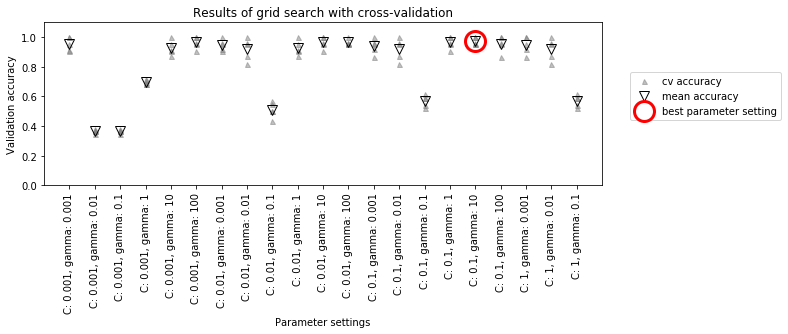

In [12]:
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # for each combination of parameters, train an SVC
        svm = SVC(gamma=gamma, C=C)
        # perform cross-validation
        scores = cross_val_score(svm, X_trainval, y_trainval, cv=5)
        # compute mean cross-validation accuracy
        score = np.mean(scores)
        # if we got a better score, store the score and the parameters
        if score > best_score:
            best_score = score
            best_parameters = {'C':C, 'gamma': gamma}
print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))

# Rebuild a model on the combined training and valiation set, and evaluate it on the test set
print("-----------+++-----------")
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)
test_score = svm.score(X_test, y_test)
print("Best score on validation set: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))
print("Test set score with best parameters: {:.2f}".format(test_score))

mglearn.plots.plot_cross_val_selection()
plt.title("Results of grid search with cross-validation")
plt.show()

Overview of the process of parameter selection and model evaluation with GridSearchCV


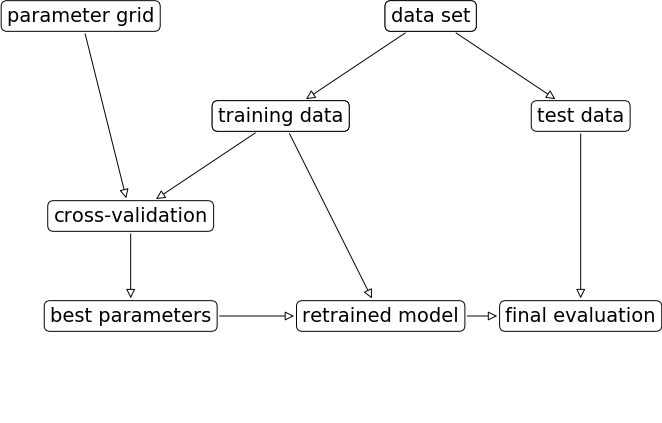

In [13]:
mglearn.plots.plot_grid_search_overview()
print("Overview of the process of parameter selection and model evaluation with GridSearchCV")
plt.show()

In [14]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
print("Parameter grid: \n{}".format(param_grid))
print("\n")


from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
grid_search = GridSearchCV(SVC(), param_grid, cv=5)

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)
grid_search.fit(X_train, y_train)
print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))
print("\n")

print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-valiation score: {:.2f}".format(grid_search.best_score_))
print("Best estimator: \n{}".format(grid_search.best_estimator_))

Parameter grid: 
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}


Test set score: 0.97


Best parameters: {'C': 100, 'gamma': 0.01}
Best cross-valiation score: 0.97
Best estimator: 
SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [15]:
import pandas as pd
# convert to DataFrame
results = pd.DataFrame(grid_search.cv_results_)
# show the first 5 rows
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.000633,0.000146,0.000263,0.000040,0.001,0.001,"{'C': 0.001, 'gamma': 0.001}",0.375,0.347826,0.363636,...,0.366071,0.011371,22,0.363636,0.370787,0.366667,0.366667,0.362637,0.366079,0.002852
1,0.000506,0.000013,0.000245,0.000028,0.001,0.01,"{'C': 0.001, 'gamma': 0.01}",0.375,0.347826,0.363636,...,0.366071,0.011371,22,0.363636,0.370787,0.366667,0.366667,0.362637,0.366079,0.002852
2,0.000502,0.000015,0.000228,0.000003,0.001,0.1,"{'C': 0.001, 'gamma': 0.1}",0.375,0.347826,0.363636,...,0.366071,0.011371,22,0.363636,0.370787,0.366667,0.366667,0.362637,0.366079,0.002852
3,0.000501,0.000017,0.000223,0.000008,0.001,1,"{'C': 0.001, 'gamma': 1}",0.375,0.347826,0.363636,...,0.366071,0.011371,22,0.363636,0.370787,0.366667,0.366667,0.362637,0.366079,0.002852
4,0.000471,0.000034,0.000225,0.000009,0.001,10,"{'C': 0.001, 'gamma': 10}",0.375,0.347826,0.363636,...,0.366071,0.011371,22,0.363636,0.370787,0.366667,0.366667,0.362637,0.366079,0.002852


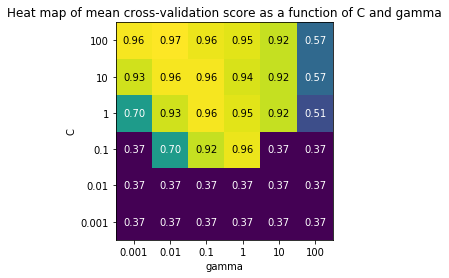

In [16]:
scores = np.array(results.mean_test_score).reshape(6,6)
# plot the mean cross-validation scores
mglearn.tools.heatmap(scores, xlabel='gamma', xticklabels=param_grid['gamma'], ylabel='C', yticklabels=param_grid['C'], cmap="viridis")
plt.title("Heat map of mean cross-validation score as a function of C and gamma")
plt.show()

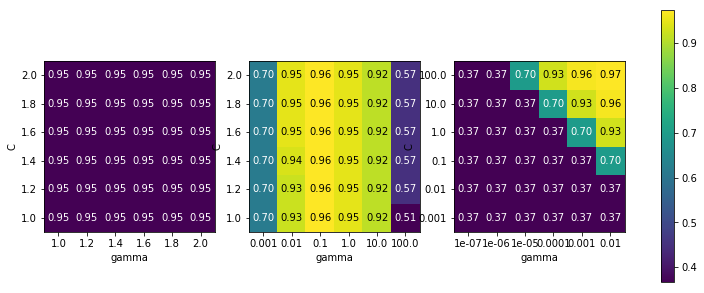

In [17]:
fig, axes = plt.subplots(1, 3, figsize=(13, 5))

param_grid_linear = {'C': np.linspace(1, 2, 6), 'gamma': np.linspace(1, 2, 6)}
param_grid_one_log = {'C': np.linspace(1, 2, 6), 'gamma': np.logspace(-3, 2, 6)}
param_grid_range = {'C': np.logspace(-3, 2, 6), 'gamma': np.logspace(-7, -2, 6)}

for param_grid, ax in zip([param_grid_linear, param_grid_one_log, param_grid_range], axes):
    grid_search = GridSearchCV(SVC(), param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    scores = grid_search.cv_results_['mean_test_score'].reshape(6, 6)
    
    # plot the mean cross-valiation scores
    scores_image = mglearn.tools.heatmap( scores, xlabel='gamma', ylabel='C', 
                                         xticklabels=param_grid['gamma'], yticklabels=param_grid['C'],
                                        cmap="viridis", ax=ax)
plt.colorbar(scores_image, ax=axes.tolist())
plt.show()

In [18]:
# it makes no seanes to use 'gamma' with 'linear' kernel in SVM. 
param_grid = [{'kernel': ['rbf'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
              {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}]
print("List of grids:\n{}".format(param_grid))
print("\n")

grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-valiation score: {:.2f}".format(grid_search.best_score_))
print("Best estimator: \n{}".format(grid_search.best_estimator_))

results = pd.DataFrame(grid_search.cv_results_)
# we display the transposed table so that it better fits on the page: 
results.T

List of grids:
[{'kernel': ['rbf'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}, {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}]


Best parameters: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
Best cross-valiation score: 0.97
Best estimator: 
SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
mean_fit_time,0.000521803,0.000492907,0.000467587,0.000505114,0.000482559,0.000495815,0.000481367,0.000477219,0.000514269,0.000480175,...,0.000274515,0.000389099,0.000540924,0.00055337,0.000355864,0.000326014,0.000293303,0.000277662,0.000282001,0.000286341
std_fit_time,7.17726e-05,2.0824e-05,2.39576e-05,1.4542e-05,5.01926e-06,3.36718e-05,1.17606e-05,6.78987e-06,3.43127e-05,5.81663e-06,...,2.29153e-05,0.000104878,1.88971e-05,9.85912e-06,4.16134e-06,1.13443e-06,7.68048e-06,6.33781e-06,1.20437e-05,2.02872e-05
mean_score_time,0.000227976,0.000235748,0.00021596,0.000228405,0.000208855,0.000230789,0.000217247,0.000215578,0.000229263,0.000220585,...,0.000165653,0.000186777,0.000189972,0.000210238,0.000176334,0.000172424,0.000178003,0.000179243,0.000165558,0.000164366
std_score_time,1.51432e-05,1.93401e-05,7.32283e-06,1.32119e-05,1.19571e-05,9.69048e-06,5.32992e-06,7.26046e-06,5.02967e-06,4.34786e-06,...,8.71452e-07,1.60061e-05,9.58241e-06,3.20456e-05,3.42062e-06,1.01601e-06,1.70022e-05,2.53013e-05,1.92278e-06,5.35248e-07
param_C,0.001,0.001,0.001,0.001,0.001,0.001,0.01,0.01,0.01,0.01,...,100,100,100,100,0.001,0.01,0.1,1,10,100
param_gamma,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,...,0.1,1,10,100,NaN,NaN,NaN,NaN,NaN,NaN
param_kernel,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,...,rbf,rbf,rbf,rbf,linear,linear,linear,linear,linear,linear
params,"{'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 1, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 10, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 100, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 1, 'kernel': 'rbf'}",...,"{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 100, 'gamma': 1, 'kernel': 'rbf'}","{'C': 100, 'gamma': 10, 'kernel': 'rbf'}","{'C': 100, 'gamma': 100, 'kernel': 'rbf'}","{'C': 0.001, 'kernel': 'linear'}","{'C': 0.01, 'kernel': 'linear'}","{'C': 0.1, 'kernel': 'linear'}","{'C': 1, 'kernel': 'linear'}","{'C': 10, 'kernel': 'linear'}","{'C': 100, 'kernel': 'linear'}"
split0_test_score,0.375,0.375,0.375,0.375,0.375,0.375,0.375,0.375,0.375,0.375,...,0.958333,0.916667,0.875,0.541667,0.375,0.916667,0.958333,1,0.958333,0.958333
split1_test_score,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,...,1,1,0.956522,0.521739,0.347826,0.826087,0.913043,0.956522,1,1


In [19]:
# Nested cross-validation
scores = cross_val_score(GridSearchCV(SVC(), param_grid, cv=5), iris.data, iris.target, cv=5)
print("Cross-validation scores: ", scores)
print("Mean cross-validation score: ", scores.mean())

Cross-validation scores:  [0.96666667 1.         0.9        0.96666667 1.        ]
Mean cross-validation score:  0.9666666666666668


In [20]:
def nested_cv(X, y, inner_cv, outer_cv, Classifier, parameter_grid):
    outer_scores = []
    # for each split of the data in the outer cross-validation
    # split method returns indices
    for training_samples, test_samples in outer_cv.split(X, y):
        # find best parameter using inner cross-validation
        best_params = {}
        best_score = -np.inf
        # iterate over parameters
        for parameters in parameter_grid:
            # accumulate score over inner splits
            cv_scores = []
            # iterate over inner cross-validation
            for inner_train, inner_test in inner_cv.split(X[training_samples], y[training_samples]):
                #build classifier given parameters and training data
                clf = Classifier(**parameters)
                clf.fit(X[inner_train], y[inner_train])
                #evaluate on inner test set
                score = clf.score(X[inner_test], y[inner_test])
                cv_scores.append(score)
            #compute mean score over inner folds
            mean_score = np.mean(cv_scores)
            if mean_score > best_score:
                # if better than so far, remember parameters
                best_score = mean_score
                best_params = parameters
        # build classifier on best parameters using outer training set
        clf = Classifier(**best_params)
        clf.fit(X[training_samples], y[training_samples])
        # evaluate
        outer_scores.append(clf.score(X[test_samples], y[test_samples]))
    return np.array(outer_scores)

from sklearn.model_selection import ParameterGrid, StratifiedKFold
scores = nested_cv(iris.data, iris.target, StratifiedKFold(5), StratifiedKFold(5), SVC, ParameterGrid(param_grid))
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [0.96666667 1.         0.96666667 0.96666667 1.        ]
